**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range? 
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

My responses to question 1 are included in a pdf in the assignment directory, named 'Question1.pdf'

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
7. Which giftors provide the most money, in total?

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1
foreigngifts =  pd.read_csv('./data/ForeignGifts_edu.csv')
foreigngifts.head()


,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


(array([2.7681e+04, 3.1500e+02, 7.7000e+01, 3.6000e+01, 2.0000e+01,
        2.9000e+01, 1.4000e+01, 9.0000e+00, 5.0000e+00, 6.0000e+00,
        3.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00, 4.0000e+00,
        1.1000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 7.0000e+00]),
 array([ -537770.        ,  4489118.45      ,  9516006.9       ,
        14542895.35      , 19569783.8       , 24596672.25      ,
        29623560.7       , 34650449.15      , 39677337.6       ,
        44704226.05      , 49731114.5       , 54758002.95      ,
        59784891.40000001, 64811779.85      , 69838668.3       ,
        74865556.75      , 79892445.2       , 84919333.65      ,
        89946222.10000001, 94973110.55      , 99999999.        ]),
 <BarContainer object of 20 artists>)

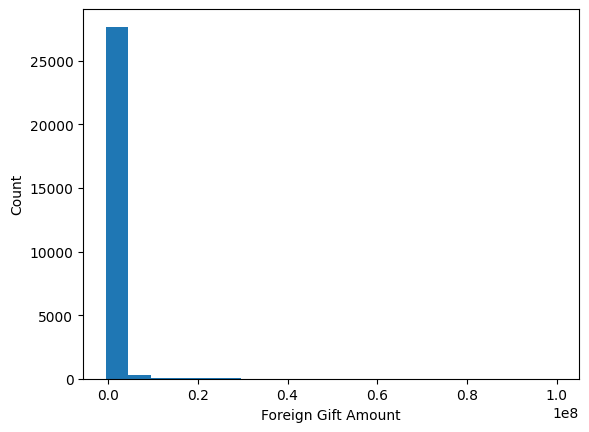

In [3]:
# 2
sns.histplot(foreigngifts['Foreign Gift Amount'])
plt.hist(foreigngifts['Foreign Gift Amount'], bins=20)

In [4]:
foreigngifts['Foreign Gift Amount'].describe()

count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64

The variable is quantified in scientific notation, likely due to the high values included in the data set. The mean of the data set is also higher than the upper quartile, allowing me to infer that there are large outliers included in the data set. 

<Axes: xlabel='Gift Type', ylabel='Count'>

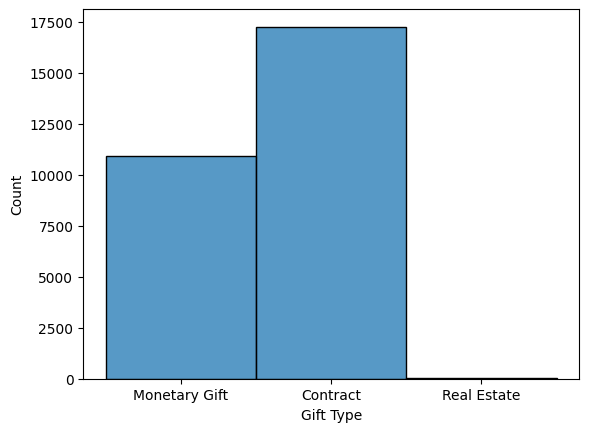

In [ ]:
# 3
sns.histplot(foreigngifts['Gift Type'])


In [8]:
gifttypecounts = foreigngifts['Gift Type'].value_counts()
print(gifttypecounts)
print(gifttypecounts['Contract']/28211)
print(gifttypecounts['Monetary Gift']/28211)
print(gifttypecounts['Real Estate']/28211)

Gift Type
Contract         17274
Monetary Gift    10936
Real Estate         11
Name: count, dtype: int64
0.6123143454680798
0.3876502073659211
0.0003899188259898621


<Axes: xlabel='Foreign Gift Amount', ylabel='Density'>

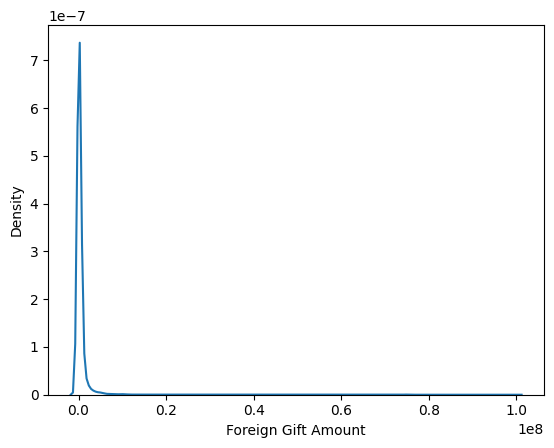

In [13]:
sns.kdeplot(foreigngifts['Foreign Gift Amount'])

/home/teaganabritten/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


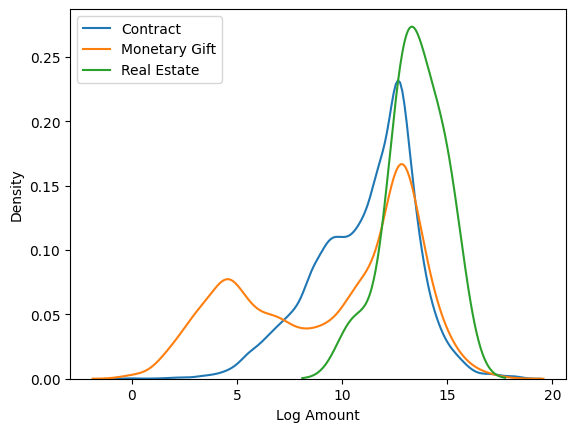

In [18]:
foreigngifts['Log Amount'] = np.log(foreigngifts['Foreign Gift Amount'])
amountbytype = foreigngifts.groupby('Gift Type')['Log Amount']

for name, group in amountbytype:
    sns.kdeplot(group, label=name)
plt.legend()

In [21]:
# 5
fgcountrydonations = foreigngifts.groupby('Country of Giftor').size().sort_values(ascending=False).head(15)
print(fgcountrydonations)


Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
dtype: int64


In [22]:

fgcountryamount = foreigngifts.groupby('Country of Giftor')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print(fgcountryamount)


Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409202
Name: Foreign Gift Amount, dtype: int64


In [25]:
# 6
fginstitutions = foreigngifts.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending=False)
print(fginstitutions.head(15))


Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64


<Axes: xlabel='Foreign Gift Amount', ylabel='Count'>

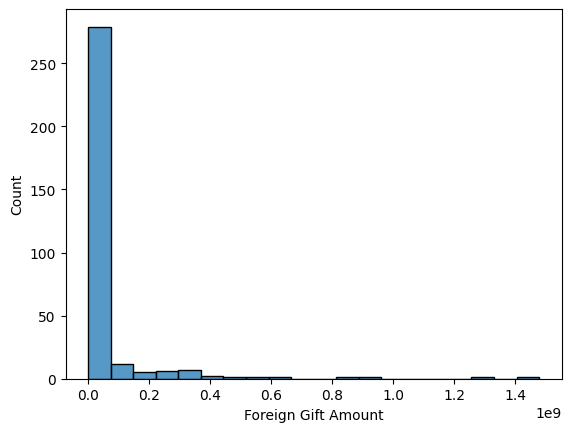

In [28]:
sns.histplot(fginstitutions, bins=20)

In [32]:
fggiftors = foreigngifts.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False)
print(fggiftors.head(15))

Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64


**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [82]:
# 1
airbnb = pd.read_csv('./data/airbnb_hw.csv')
# 2

airbnb.head(5)

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [83]:
airbnb.tail(5)

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
30473,43022976,8/31/2015,10 Mins to Time Square/two floors,Queens,Apartment,NaN,Entire home/apt,11101.0,5.0,1,0,300,NaN
30474,42993382,8/31/2015,"1BR ocean view & F,Q train st",Brooklyn,Apartment,NaN,Private room,11224.0,2.0,1,0,125,NaN
30475,43033067,8/31/2015,Amazing Private Room,Brooklyn,Other,NaN,Private room,11206.0,1.0,1,0,80,NaN
30476,43000991,8/31/2015,Charming private female room: UWS,Manhattan,Apartment,NaN,Private room,10025.0,1.0,1,0,35,NaN
30477,42999189,8/31/2015,Huge Beautiful Bedroom - Astoria,Queens,House,NaN,Private room,11105.0,1.0,1,0,80,NaN


There are 30477 observations in the data set, each containing 13 different variables. Some of those include the type of property, the neighbourhood the property is in, and how many bedrooms are in the property. 

In [ ]:
# 3

pd.crosstab(airbnb['Room Type'], airbnb['Property Type'])

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


It appears that houses are most likely to provide a private room, while Apartments and RVs often offer the entire property. Townhouse and Condo have low numbers of entries, and that likely comes from user entering them under house and apartment respectively. 

(array([2.806e+03, 9.699e+03, 6.991e+03, 5.128e+03, 2.454e+03, 1.299e+03,
        5.410e+02, 4.660e+02, 2.210e+02, 2.230e+02, 8.800e+01, 1.100e+02,
        4.800e+01, 6.000e+01, 4.600e+01, 4.800e+01, 1.600e+01, 3.100e+01,
        1.000e+00, 2.100e+01]),
 array([ 10.  ,  59.45, 108.9 , 158.35, 207.8 , 257.25, 306.7 , 356.15,
        405.6 , 455.05, 504.5 , 553.95, 603.4 , 652.85, 702.3 , 751.75,
        801.2 , 850.65, 900.1 , 949.55, 999.  ]),
 <BarContainer object of 20 artists>)

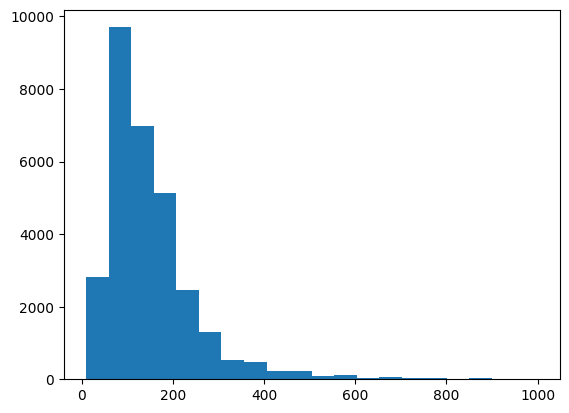

In [85]:
# 4
airbnb['Price'] = pd.to_numeric(airbnb['Price'], errors='coerce')
plt.hist(airbnb['Price'], bins=20)

<Axes: xlabel='Price', ylabel='Density'>

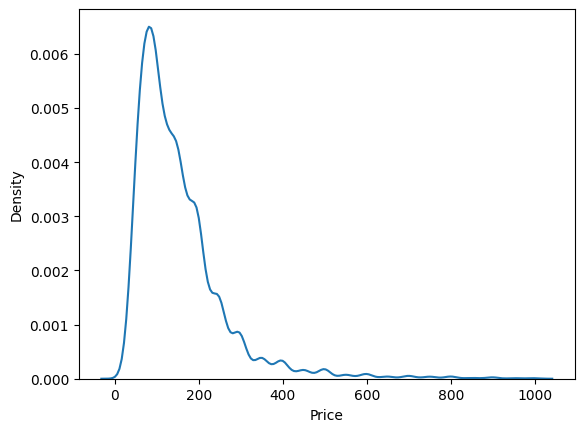

In [86]:
sns.kdeplot(airbnb['Price'])

<Axes: ylabel='Price'>

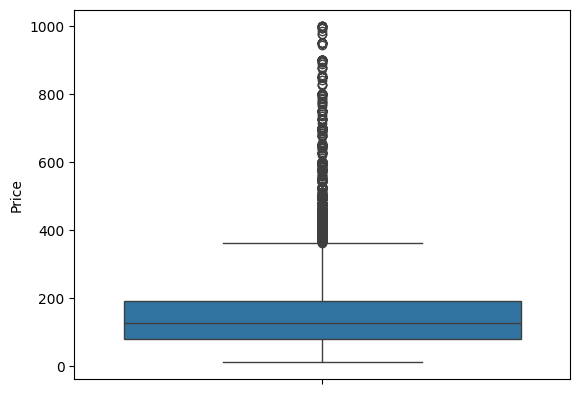

In [87]:
sns.boxplot(airbnb['Price'])

(array([3.000e+00, 1.600e+01, 3.460e+02, 3.220e+03, 7.326e+03, 8.585e+03,
        7.531e+03, 2.137e+03, 8.710e+02, 2.620e+02]),
 array([2.30258509, 2.76300206, 3.22341903, 3.683836  , 4.14425297,
        4.60466994, 5.0650869 , 5.52550387, 5.98592084, 6.44633781,
        6.90675478]),
 <BarContainer object of 10 artists>)

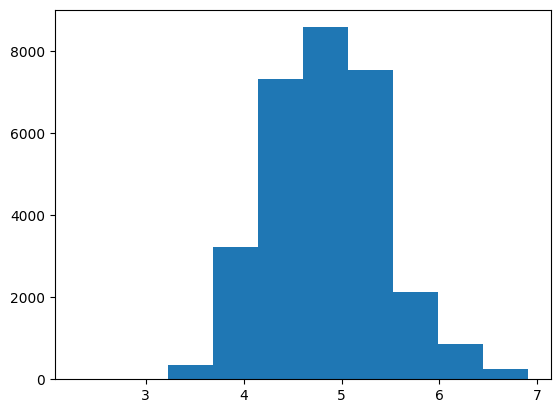

In [88]:
airbnb['log_price'] = np.log(airbnb['Price'])
plt.hist(airbnb['log_price'], bins=10)

<Axes: xlabel='log_price', ylabel='Density'>

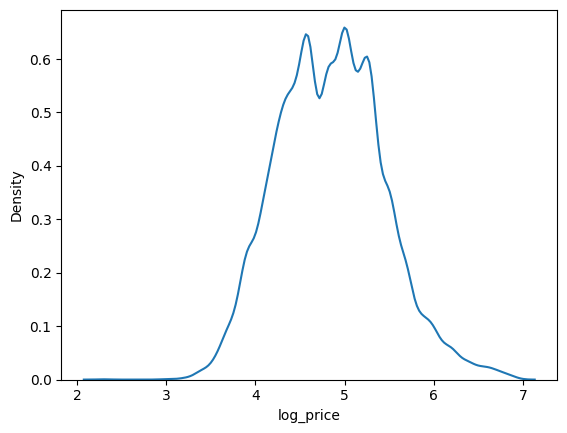

In [89]:
sns.kdeplot(airbnb['log_price'])

<Axes: ylabel='log_price'>

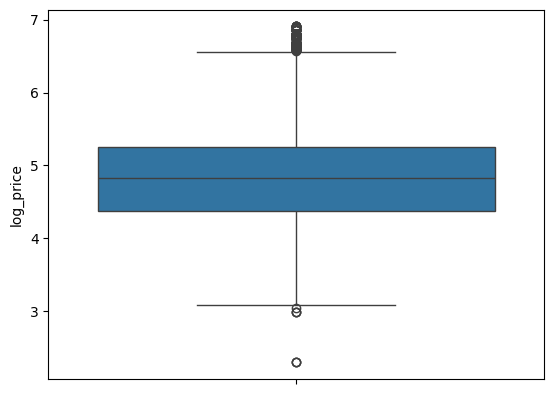

In [90]:
sns.boxplot(airbnb['log_price'])

Text(0, 0.5, 'Number of Beds')

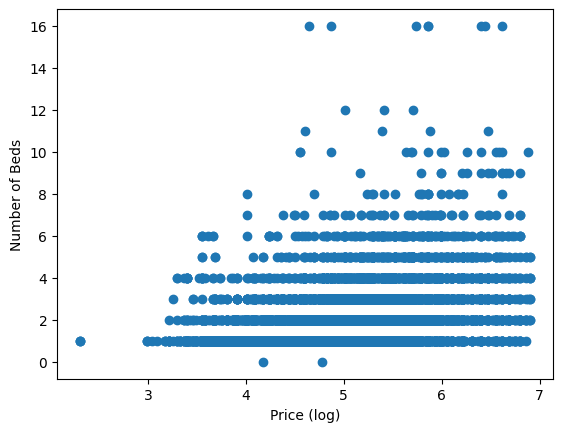

In [91]:
# 5
plt.scatter(airbnb['log_price'], airbnb['Beds'])
plt.xlabel("Price (log)")
plt.ylabel("Number of Beds")

There is a relationship between price and number of bedrooms, with the price increasing as the number of bedrooms in the property increases. 

In [92]:
pricebybed = airbnb.groupby('Beds')['Price'].describe()
print(pricebybed)

        count        mean         std    min     25%    50%     75%    max
Beds                                                                      
0.0       2.0   92.000000   38.183766   65.0   78.50   92.0  105.50  119.0
1.0   20307.0  124.757670   75.685752   10.0   75.00  100.0  155.00  950.0
2.0    6561.0  186.702332  115.044205   25.0  115.00  160.0  225.00  999.0
3.0    2029.0  234.928043  142.288189   26.0  140.00  200.0  299.00  999.0
4.0     766.0  280.554830  175.512312   27.0  150.00  240.0  363.75  999.0
5.0     274.0  322.000000  190.319415   35.0  186.00  285.0  425.00  995.0
6.0     166.0  316.313253  201.157585   35.0  183.75  271.0  399.00  900.0
7.0      45.0  341.377778  220.116631   55.0  177.00  300.0  445.00  900.0
8.0      20.0  331.850000  155.652202   55.0  218.75  339.5  408.75  750.0
9.0      14.0  587.142857  208.351721  175.0  423.75  625.0  750.00  900.0
10.0     15.0  442.200000  263.926992   95.0  287.00  400.0  650.00  975.0
11.0      4.0  332.250000

The standard deviation increases as the number of bedrooms increases, likely due to the fact that there are fewer and fewer observations as the number of bedrooms reaches uncommon levels. 

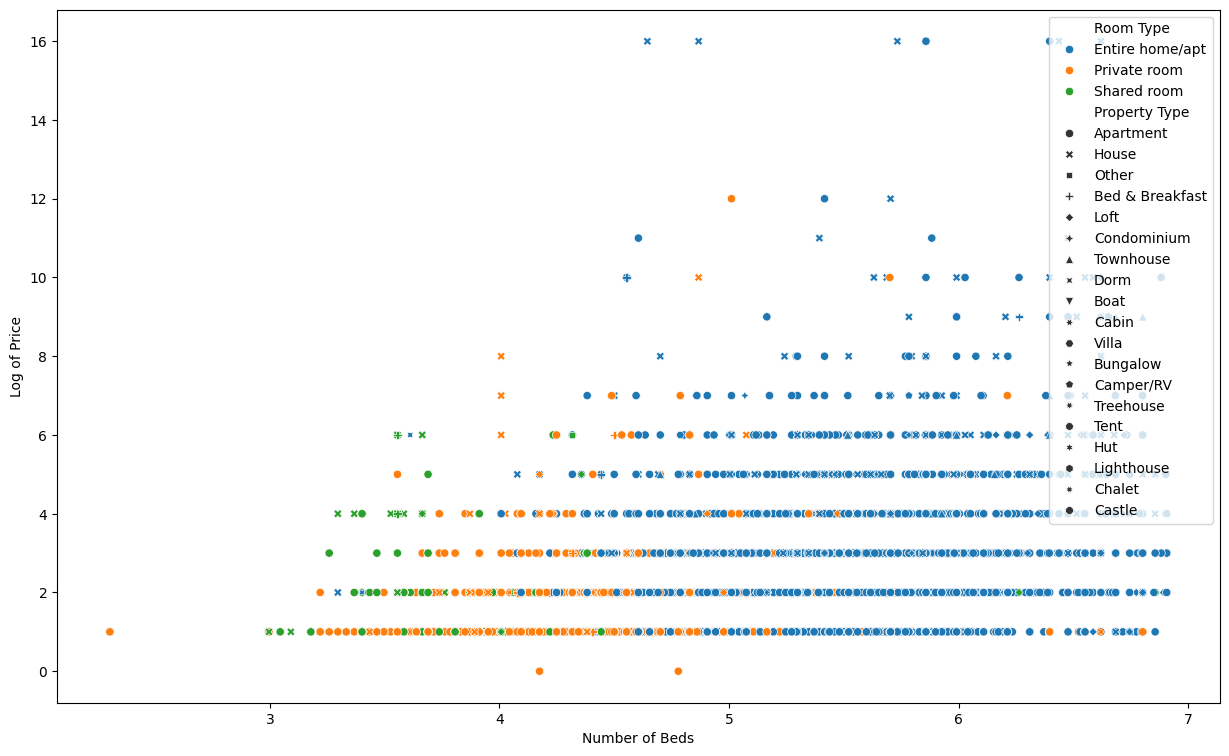

In [100]:
# 6
plt.figure(figsize=(15,9))
sns.scatterplot(data=airbnb, x='log_price', y='Beds', hue='Room Type', style='Property Type')
plt.xlabel('Number of Beds')
plt.ylabel('Log of Price')
plt.legend(loc='upper right')
plt.show()


In [104]:
airbnb.groupby('Room Type')['Price'].describe()


,count,mean,std,min,25%,50%,75%,max
Room Type,,,,,,,,
Entire home/apt,16855.0,204.061525,116.531136,10.0,135.0,175.0,239.0,999.0
Private room,12599.0,90.663227,47.914195,10.0,65.0,80.0,100.0,999.0
Shared room,843.0,76.553974,65.756210,10.0,45.0,60.0,85.0,950.0


In [105]:
airbnb.groupby('Property Type')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Property Type,,,,,,,,
Apartment,26975.0,153.863170,104.112805,10.0,85.00,129.0,195.00,999.0
Bed & Breakfast,180.0,106.572222,84.701977,30.0,65.00,87.5,125.00,900.0
Boat,8.0,153.625000,49.231051,100.0,120.00,137.5,178.50,250.0
Bungalow,4.0,150.750000,46.464144,87.0,133.50,160.5,177.75,195.0
Cabin,2.0,165.000000,120.208153,80.0,122.50,165.0,207.50,250.0
Camper/RV,7.0,103.571429,102.343958,39.0,47.00,49.0,109.00,325.0
Castle,1.0,150.000000,NaN,150.0,150.00,150.0,150.00,150.0
Chalet,1.0,99.000000,NaN,99.0,99.00,99.0,99.00,99.0
Condominium,93.0,237.946237,172.754121,46.0,130.00,175.0,295.00,850.0


Looking at the graph, there is a clear distinction between the three room types, with them increasing in order from shared to single room to whole property. Most of the values that protrude from the large collection of points are houses, and this is likely due to the largest properties being houses. I was surprised to see that townhouses had a higher mean than houses, but that could be due to less observances. The median appears to be a more accurate measure of center in this dataset, due to the fact that the mean is pulled higher by high-priced properties. 

Text(0.5, 36.72222222222221, 'Price (Log)')

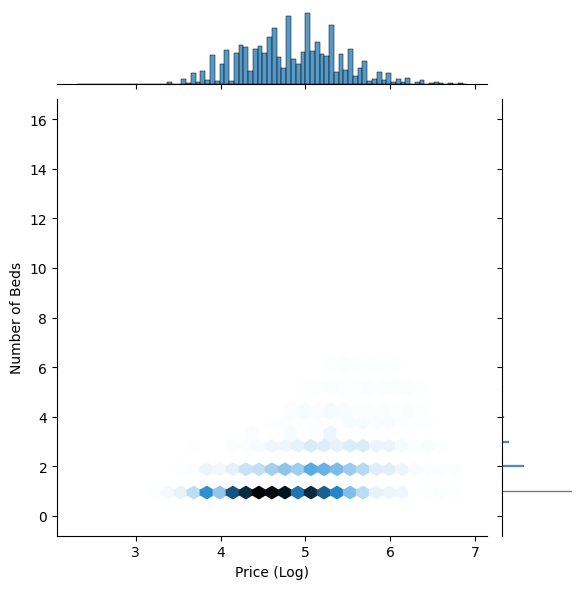

In [112]:
# 7
sns.jointplot(data=airbnb, y='Beds', x='log_price', kind='hex', gridsize=30)
plt.ylabel('Number of Beds')
plt.xlabel('Price (Log)')

Most of the data is for properties with up to 2 bedrooms, with very little data on properties having 5+ bedrooms. Plots 5 and 6 do not clearly represent that the amount of data for properties with 2 or less bedrooms is so much greater than the amount of data with more, and instead shows a graph that portrays a comparable amount of data for more bedrooms. Adjusting those plots to represent density of data could help alleviate this issue. 

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.